In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
df=pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [3]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
df.corr(method='pearson')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [5]:
X=df.drop(['fbs','target'],axis=1)

In [6]:
y=df['target']

In [7]:
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [8]:
X=pd.get_dummies(X)

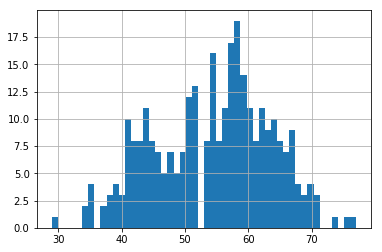

In [9]:
X['age'].hist(bins=50)

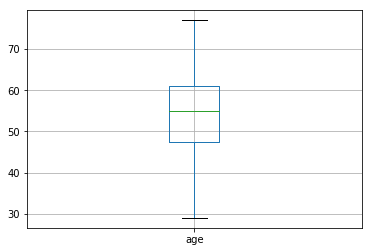

In [10]:
X.boxplot(column='age')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='density')` instead of `Series.plot('density',)`.
  """Entry point for launching an IPython kernel.


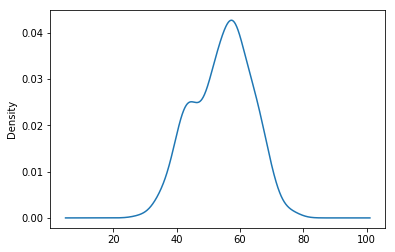

In [11]:
X['age'].plot('density')

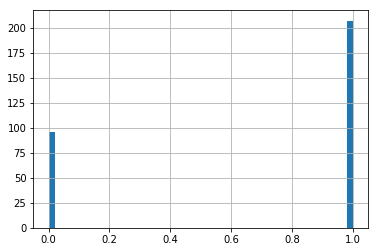

In [12]:
X['sex'].hist(bins=50)

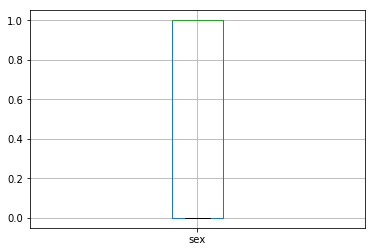

In [13]:
X.boxplot(column='sex')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='density')` instead of `Series.plot('density',)`.
  """Entry point for launching an IPython kernel.


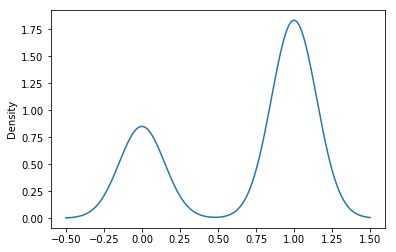

In [14]:
X['sex'].plot('density')

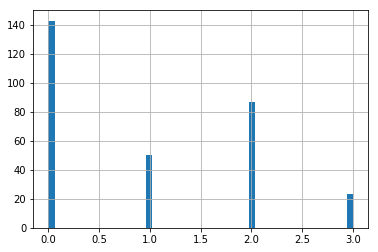

In [15]:
X['cp'].hist(bins=50)

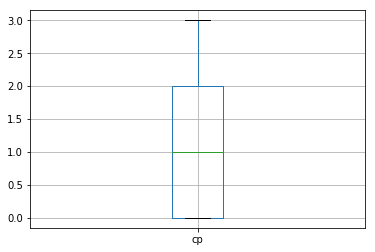

In [16]:
X.boxplot(column='cp')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='density')` instead of `Series.plot('density',)`.
  """Entry point for launching an IPython kernel.


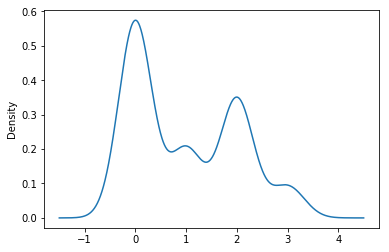

In [17]:
X['cp'].plot('density')

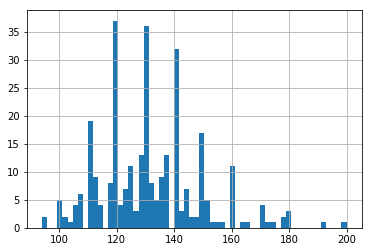

In [18]:
X['trestbps'].hist(bins=60)

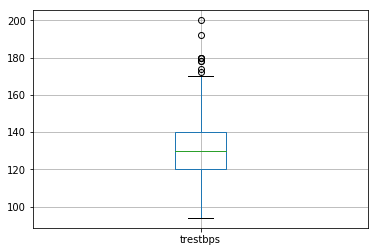

In [19]:
X.boxplot(column='trestbps')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='density')` instead of `Series.plot('density',)`.
  """Entry point for launching an IPython kernel.


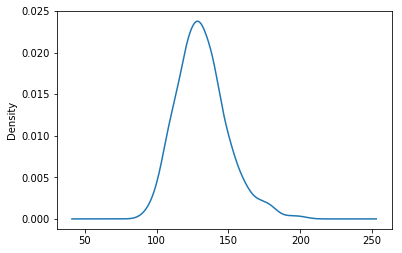

In [20]:
X['trestbps'].plot('density')

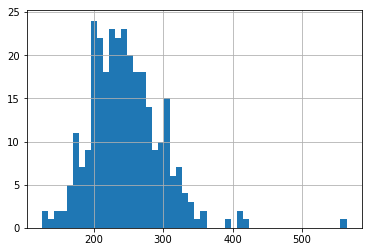

In [21]:
X['chol'].hist(bins=50)

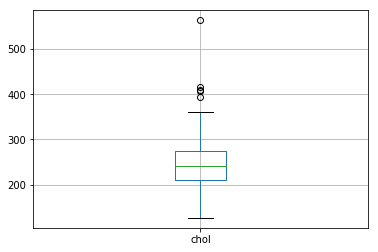

In [22]:
X.boxplot(column='chol')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='density')` instead of `Series.plot('density',)`.
  """Entry point for launching an IPython kernel.


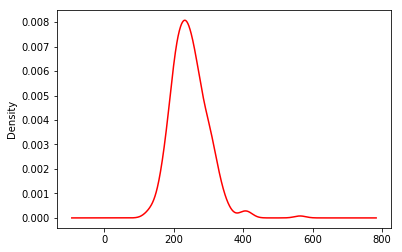

In [23]:
X['chol'].plot('density',color='Red')

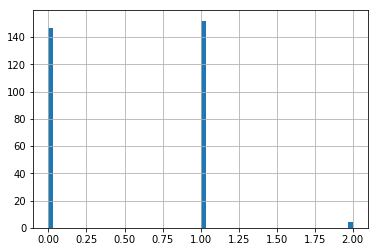

In [24]:
X['restecg'].hist(bins=60)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='density')` instead of `Series.plot('density',)`.
  """Entry point for launching an IPython kernel.


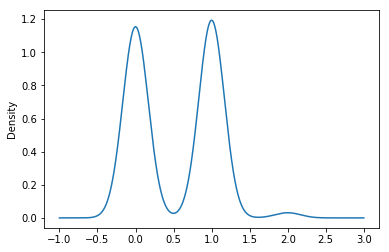

In [25]:
X['restecg'].plot('density')

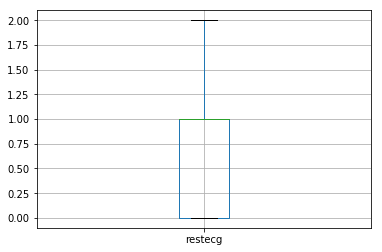

In [26]:
X.boxplot(column='restecg')

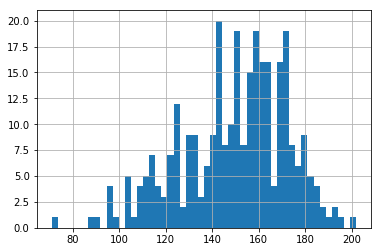

In [27]:
X['thalach'].hist(bins=50)

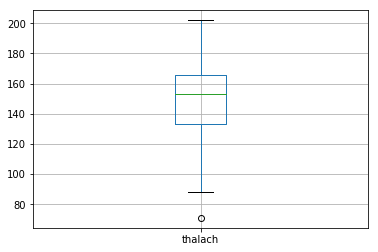

In [28]:
X.boxplot(column='thalach')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='density')` instead of `Series.plot('density',)`.
  """Entry point for launching an IPython kernel.


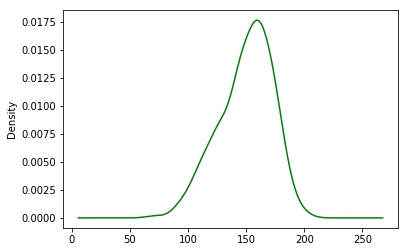

In [29]:
X['thalach'].plot('density',color='Green')

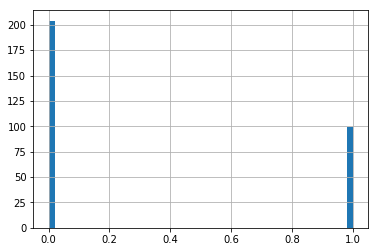

In [30]:
X['exang'].hist(bins=50)

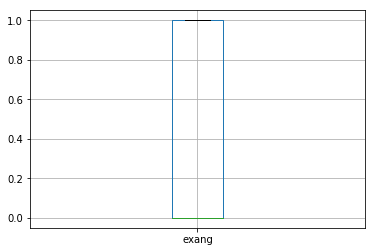

In [31]:
X.boxplot(column='exang')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='density')` instead of `Series.plot('density',)`.
  """Entry point for launching an IPython kernel.


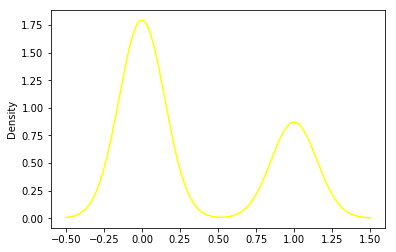

In [32]:
X['exang'].plot('density',color='Yellow')

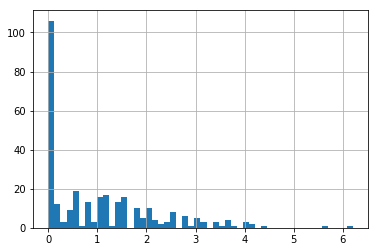

In [33]:
X['oldpeak'].hist(bins=50)

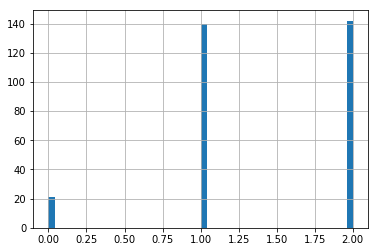

In [34]:
X['slope'].hist(bins=50)

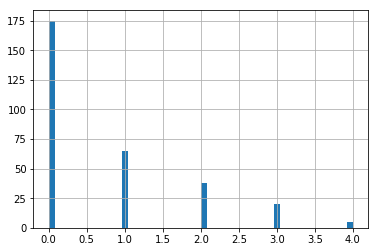

In [35]:
X['ca'].hist(bins=50)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='density')` instead of `Series.plot('density',)`.
  """Entry point for launching an IPython kernel.


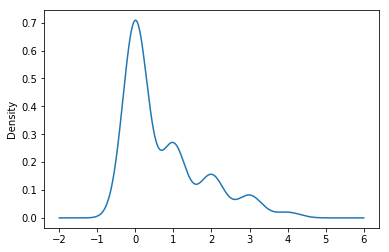

In [36]:
X['ca'].plot('density')

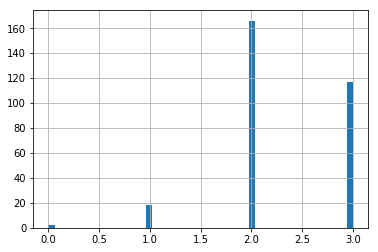

In [37]:
X['thal'].hist(bins=50)

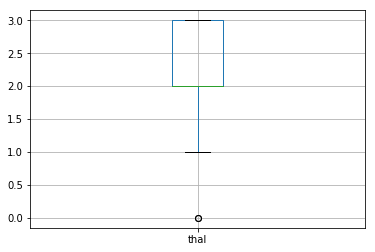

In [38]:
X.boxplot(column='thal')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='density')` instead of `Series.plot('density',)`.
  """Entry point for launching an IPython kernel.


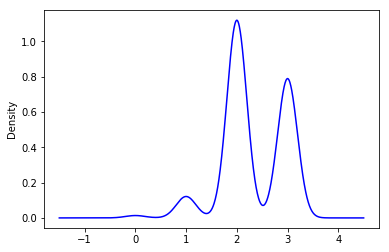

In [39]:
X['thal'].plot('density',color='Blue')

In [40]:
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [42]:
from sklearn.linear_model import LogisticRegression
qs=LogisticRegression()
qs.fit(X_train,y_train)
qs.score(X_test,y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8032786885245902

In [43]:
from sklearn.tree import DecisionTreeRegressor
wx=DecisionTreeRegressor(max_depth=3)
wx.fit(X_train,y_train)
wx.score(X_test,y_test)

0.3354370971535946

In [44]:
from sklearn.ensemble import RandomForestRegressor
oh=RandomForestRegressor()
oh.fit(X_train,y_train)
oh.score(X_test,y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.3978879310344827

In [45]:
from sklearn.linear_model import LinearRegression
qc=LinearRegression()
qc.fit(X_train,y_train)
qc.score(X_test,y_test)

0.46203015013108795

In [46]:
y_test.value_counts()

0    32
1    29
Name: target, dtype: int64

In [47]:
from sklearn.ensemble import RandomForestClassifier
pa=RandomForestClassifier()
pa.fit(X_train,y_train)
pa.score(X_test,y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8032786885245902

In [48]:
from sklearn.tree import DecisionTreeClassifier
qm=DecisionTreeClassifier()
qm.fit(X_train,y_train)
qm.score(X_test,y_test)

0.7704918032786885

In [49]:
from sklearn.svm import SVC
os=SVC()
os.fit(X_train,y_train)
os.score(X_test,y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.47540983606557374

In [50]:
from sklearn.neighbors import KNeighborsClassifier
ql=KNeighborsClassifier()
ql.fit(X_train,y_train)
ql.score(X_test,y_test)

0.7213114754098361

In [51]:
#save model
import pickle 
file_name='DISEASE.sav'

tuples=(pa,X)
pickle.dump(tuples,open(file_name,'wb'))

In [52]:
from sklearn.metrics import confusion_matrix
ypp=qs.predict(X_test)
result1=confusion_matrix(y_test,ypp)
print(result1)

[[22 10]
 [ 2 27]]


In [53]:
from sklearn.metrics import confusion_matrix
ypp1=pa.predict(X_test)
result2=confusion_matrix(y_test,ypp1)
print(result2)

[[24  8]
 [ 4 25]]


In [54]:
from sklearn.metrics import confusion_matrix
ypp2=qm.predict(X_test)
result3=confusion_matrix(y_test,ypp2)
print(result3)

[[24  8]
 [ 6 23]]


In [55]:
from sklearn.metrics import confusion_matrix
ypp3=os.predict(X_test)
result4=confusion_matrix(y_test,ypp3)
print(result4)

[[ 0 32]
 [ 0 29]]


In [56]:
from sklearn.metrics import confusion_matrix
ypp4=ql.predict(X_test)
result5=confusion_matrix(y_test,ypp4)
print(result5)

[[22 10]
 [ 7 22]]


In [57]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
fpr,tpr,threshold=roc_curve(y_test,qs.predict_proba(X_test)[:,1])

In [58]:
fpr

array([0.     , 0.     , 0.     , 0.03125, 0.03125, 0.09375, 0.09375,
       0.125  , 0.125  , 0.1875 , 0.1875 , 0.3125 , 0.3125 , 0.5    ,
       0.5    , 0.625  , 0.625  , 1.     ])

In [59]:
tpr

array([0.        , 0.03448276, 0.37931034, 0.37931034, 0.68965517,
       0.68965517, 0.72413793, 0.72413793, 0.79310345, 0.79310345,
       0.82758621, 0.82758621, 0.93103448, 0.93103448, 0.96551724,
       0.96551724, 1.        , 1.        ])

In [60]:
threshold

array([1.99076437, 0.99076437, 0.88430182, 0.86673004, 0.7478177 ,
       0.7242202 , 0.72013074, 0.70894995, 0.69938523, 0.65398826,
       0.64419051, 0.59306793, 0.50308036, 0.11063499, 0.10269802,
       0.05387131, 0.0373657 , 0.00341125])

In [61]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
fpr1,tpr1,threshold1=roc_curve(y_test,pa.predict_proba(X_test)[:,1])

In [62]:
fpr1

array([0.     , 0.03125, 0.0625 , 0.09375, 0.15625, 0.25   , 0.28125,
       0.375  , 0.4375 , 0.625  , 0.78125, 1.     ])

In [63]:
tpr1

array([0.        , 0.31034483, 0.37931034, 0.65517241, 0.72413793,
       0.86206897, 0.93103448, 0.96551724, 0.96551724, 0.96551724,
       1.        , 1.        ])

In [64]:
threshold1

array([2. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

In [65]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
fpr2,tpr2,threshold2=roc_curve(y_test,qm.predict_proba(X_test)[:,1])

In [66]:
fpr2

array([0.  , 0.25, 1.  ])

In [67]:
tpr2

array([0.        , 0.79310345, 1.        ])

In [68]:
threshold2

array([2., 1., 0.])

In [69]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
fpr3,tpr3,threshold3=roc_curve(y_test,ql.predict_proba(X_test)[:,1])

In [70]:
fpr3

array([0.    , 0.0625, 0.125 , 0.3125, 0.6875, 0.875 , 1.    ])

In [71]:
tpr3

array([0.        , 0.10344828, 0.37931034, 0.75862069, 0.89655172,
       1.        , 1.        ])

In [72]:
threshold3

array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

In [73]:
roc_auc=roc_auc_score(y_test,qs.predict(X_test))
roc_auc1=roc_auc_score(y_test,pa.predict(X_test))

roc_auc3=roc_auc_score(y_test,os.predict(X_test))
roc_auc4=roc_auc_score(y_test,ql.predict(X_test))
print(roc_auc,roc_auc1,roc_auc3,roc_auc4)

0.8092672413793103 0.8060344827586207 0.5 0.7230603448275862


In [74]:
y_prob=qs.predict_proba(X_test)

In [75]:
from sklearn.preprocessing import binarize
yBIN=binarize(y_prob,0.60)
yBIN

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [76]:
y_BIN1=yBIN[:,1]

In [77]:
yTYPE=y_BIN1.astype(int)

In [78]:
from sklearn.metrics import confusion_matrix
qq=confusion_matrix(y_test,yTYPE)
qq

array([[24,  8],
       [ 5, 24]])

In [79]:
from sklearn.preprocessing import binarize
yBIN=binarize(y_prob,0.70)
yBIN

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [80]:
y_BIN1=yBIN[:,1]

In [81]:
yTYPE=y_BIN1.astype(int)

In [82]:
from sklearn.metrics import confusion_matrix
qq=confusion_matrix(y_test,yTYPE)
qq

array([[28,  4],
       [ 7, 22]])

In [83]:
from sklearn.preprocessing import binarize
yBIN=binarize(y_prob,0.80)
yBIN

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [84]:
y_BIN1=yBIN[:,1]

In [85]:
yTYPE=y_BIN1.astype(int)

In [86]:
from sklearn.metrics import confusion_matrix
qq=confusion_matrix(y_test,yTYPE)
qq

array([[31,  1],
       [14, 15]])